# Intro to Gemicai

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

### Preliminaries

In [13]:
import gemicai as gem
import gemicai.utils as gu
import torch

import torchvision.models as models
from matplotlib import pyplot as plt

### Datasets
First, we let's take a look at our dataset. For this tutorial, we've already prepared a Gemicai Dataset, (or .gemset file). In the next tutorial you can learn how to generate your own gemsets. 

Directly retrieve data from the Dicom header, use this table and specify in .get_dicomo_dataset

| Dicom Header | Gemicai |
| :--- | :--- |
| Modality | modality |
| Body Part Examined | bpe |
| Study Description  | studydes |
| Series Description | seriesdes |


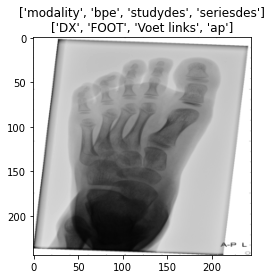

tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.7529, 0.8706],
        [1.0000, 1.0000, 1.0000,  ..., 0.9373, 0.7333, 0.9020],
        [0.8784, 1.0000, 1.0000,  ..., 0.7922, 0.9255, 0.9961]])


In [14]:
dataset = gem.DicomoDataset.get_dicomo_dataset('misc/demo.gemset')

d = None
for dicomo in dataset:
    d= dicomo
    
d.plot()
print(d.tensor)


That's how easy it is to load your dataset! Gemicai provides a bunch of built in functionality for inspecting datasets, to help you select the right data.

In [3]:
dataset.summarize('bpe')

dataset.summarize('studydes')

| Class   |   Frequency |
|---------+-------------|
| SKULL   |          12 |
| CHEST   |          20 |
| PELVIS  |          20 |
| HAND    |          20 |
| FOOT    |          20 |
Total number of training images: 92 
Total number of classes: 5

| Class                    |   Frequency |
|--------------------------+-------------|
| Zygoma/Orbita            |           2 |
| Sinus                    |          10 |
| Thorax                   |          20 |
| Bekken+heup rechts       |          13 |
| Bekken+heup links        |           5 |
| Bekken                   |           1 |
| Bekken+heup beiderzijds  |           1 |
| Vinger links             |           1 |
| Vinger rechts            |           5 |
| Pols links               |           2 |
| Pols na repositie rechts |           5 |
| Hand links               |           5 |
| Pols rechts              |           2 |
| Voet links               |          16 |
| Voet rechts              |           4 |
Total number of traini

But what if we want to see have a subset of this dataset? E.g. The same dataset but only where the modality is DX and the examined body part is HAND 

In [4]:
subset = dataset.subset(constraints={'modality':'DX', 'bpe':'HAND'})
subset.summarize('studydes')

| Class                    |   Frequency |
|--------------------------+-------------|
| Vinger links             |           1 |
| Vinger rechts            |           5 |
| Pols links               |           2 |
| Pols na repositie rechts |           5 |
| Hand links               |           5 |
| Pols rechts              |           2 |
Total number of training images: 20 
Total number of classes: 6



Having trouble understanding whats going on in the dataset? Plot an an image of every class!

modality        : DX
bpe             : SKULL
studydes        : Zygoma/Orbita
seriesdes       : pa



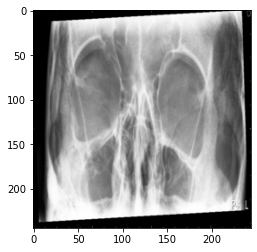

modality        : DX
bpe             : CHEST
studydes        : Thorax
seriesdes       : pa



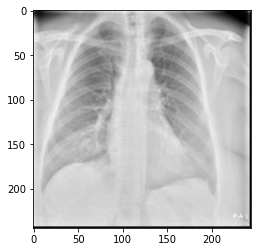

modality        : DX
bpe             : PELVIS
studydes        : Bekken+heup rechts
seriesdes       : ap



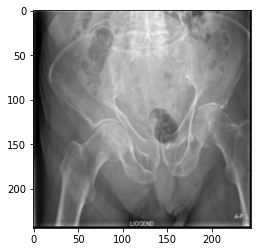

modality        : DX
bpe             : HAND
studydes        : Vinger links
seriesdes       : lat



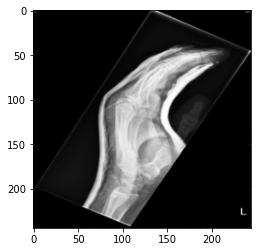

modality        : DX
bpe             : FOOT
studydes        : Voet links
seriesdes       : ap



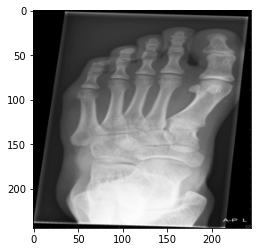

modality        : DX
bpe             : HAND
studydes        : Vinger links
seriesdes       : lat



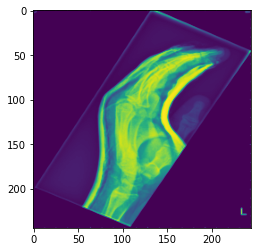

modality        : DX
bpe             : HAND
studydes        : Vinger rechts
seriesdes       : lat



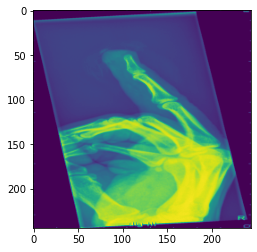

modality        : DX
bpe             : HAND
studydes        : Pols links
seriesdes       : pa



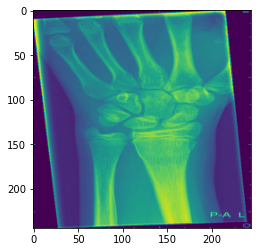

modality        : DX
bpe             : HAND
studydes        : Pols na repositie rechts
seriesdes       : lat



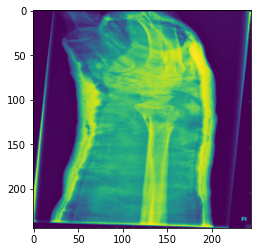

modality        : DX
bpe             : HAND
studydes        : Hand links
seriesdes       : pa



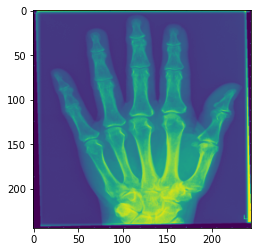

modality        : DX
bpe             : HAND
studydes        : Pols rechts
seriesdes       : lat



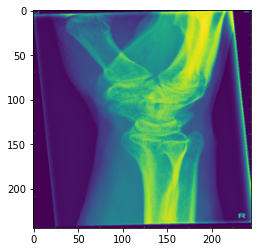

In [15]:
dataset.plot_one_of_every('bpe')

subset.plot_one_of_every('studydes', cmap='viridis_r')

### Classifiers

Take a popular pre-trained model from https://pytorch.org/docs/stable/torchvision/models.html, or build your own by extending PyTorch's nn.Module

In [16]:
# For this example, we take resnet18
resnet18 = models.resnet18(pretrained=True)

dataset = gem.DicomoDataset.get_dicomo_dataset('misc/demo.gemset', ['bpe'])

# All a classifier needs is a base model, and a list of classes you want to classify
net = gem.Classifier(resnet18, dataset.classes('bpe'), enable_cuda=False)

Now lets train the network, similar to keras, you can set verbosity to print out statistics while training.

In [17]:
net.train(dataset, epochs=5, verbosity=1)

| Epoch | Avg. loss | Train Acc. | Test Acc.  | Elapsed  |   ETA    |
|-------+-----------+------------+------------+----------+----------|
|     1 | 0.5294165 | -          | -          | 00:00:16 | 11:34:10 |
|     2 | 0.9930263 | -          | -          | 00:00:15 | 11:34:06 |
|     3 | 0.6243993 | -          | -          | 00:00:16 | 11:34:06 |
|     4 | 0.6428564 | -          | -          | 00:00:16 | 11:34:08 |
|     5 | 0.5577279 | -          | -          | 00:00:16 | 11:34:07 |


In [18]:
net.evaluate(dataset, verbosity=2)

Total: 92 -- Correct: 20 -- Accuracy: 21.74%

| Class   |   Total |   Correct | Acc    |
|---------+---------+-----------+--------|
| SKULL   |      12 |         0 | 0.0%   |
| CHEST   |      20 |         0 | 0.0%   |
| PELVIS  |      20 |         0 | 0.0%   |
| HAND    |      20 |        20 | 100.0% |
| FOOT    |      20 |         0 | 0.0%   | 



21.74

### Saving and loading a classifier

Once you're done training the classifier, and want to store it away for later, you can do so using .save(file_path)

In [19]:
net.save('classifiers/demo_classifier.gemcl')

del net

And to retrieve a Classifier use Classifier.load

In [20]:
net = gem.Classifier.from_file('classifiers/demo_classifier.gemcl')

print(net.classes)

['SKULL', 'CHEST', 'PELVIS', 'HAND', 'FOOT']


### Hyper parameter optimisation
Tweaking the network is very easy

In [12]:
net.loss_function = torch.nn.CrossEntropyLoss()
net.optimizer = torch.optim.SGD(net.module.parameters(), lr=0.001, momentum=0.9)

print(net.module)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### HTML for notebook formatting (you can ignore this)

In [ ]:
%%html
<style>
table {float:left}
</style>